In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/clustering/Clustering.csv


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline


In [40]:
def find_closest_centroids(X, centroids):
    k = centroids.shape[0]
    idx = np.zeros(X.shape[0], dtype=int)
    for i in range(X.shape[0]):
        distance = []
        for j in range(k):
            normal = np.linalg.norm(X[i]-centroids[j])
            distance.append(normal)
        idx[i] = np.argmin(distance)
    return idx


In [15]:
df = pd.read_csv('/kaggle/input/clustering/Clustering.csv')
df
X = df[['x','y']]
print("First five elements of X are:\n", X.head())
print('The shape of X is:', X.shape)

First five elements of X are:
           x         y
0  3.367596  3.536694
1  2.667870  4.479919
2  1.344171  3.282591
3  1.389414  4.683227
4  1.644644  4.320822
The shape of X is: (190, 2)


In [20]:
initial_centroids = np.array([[3,3], [4,4], [8,5]])
idx = find_closest_centroids(X, initial_centroids)
print("First three elements in idx are:", idx[:])


First three elements in idx are: [0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2]


In [23]:
def compute_centroids(X, idx, K):
    m, n = X.shape
    centroids = np.zeros((K,n))
    for k in range(K):
        points = X[idx==k]
        centroids[k] = np.mean(points, axis=0)
    return centroids
K = 3
centroids = compute_centroids(X, idx, K)

print("The centroids are:", centroids)

The centroids are: [[1.61234351 2.94209374]
 [3.16993843 4.35086834]
 [8.0026474  9.97011676]]


In [27]:
def run_kMeans(X, initial_centroids, max_iters=10, plot_progress=False):
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids    
    idx = np.zeros(m)
    for i in range(max_iters):
        
        
        print("K-Means iteration %d/%d" % (i, max_iters-1))
        
        
        idx = find_closest_centroids(X, centroids)
        
        

        centroids = compute_centroids(X, idx, K)
    plt.show() 
    return centroids, idx
initial_centroids = np.array([[3,3],[6,2],[8,5]])
K = 3

max_iters = 10

centroids, idx = run_kMeans(X, initial_centroids, max_iters, plot_progress=True)


K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


In [33]:
def kMeans_init_centroids(X, K):
    randidx = np.random.permutation(X.shape[0])
    centroids = X[randidx[:K]]
    return centroids

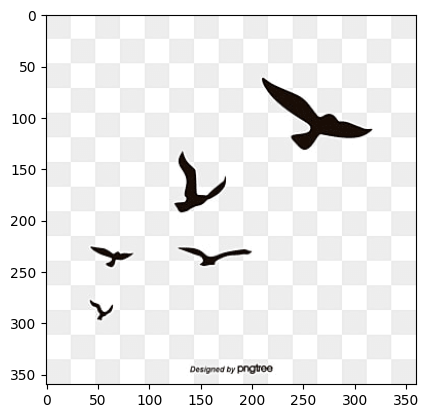

In [34]:
original_img = plt.imread('/kaggle/input/bird-png-png/bird_png.png')
plt.imshow(original_img)


In [35]:
print("Shape of original_img is:", original_img.shape)


Shape of original_img is: (360, 360, 4)


In [38]:

original_img = original_img / 255.0  # Normalize the image values to the range [0, 1]

# Check the original shape
print("Original shape:", original_img.shape)

# Reshape the image
X_img = np.reshape(original_img, (original_img.shape[0] * original_img.shape[1], original_img.shape[2]))

# Check the reshaped shape
print("Reshaped shape:", X_img.shape)


Original shape: (360, 360, 4)
Reshaped shape: (129600, 4)


In [41]:
K = 16                       
max_iters = 10               

# Using the function you have implemented above. 
initial_centroids = kMeans_init_centroids(X_img, K) 

# Run K-Means - this takes a couple of minutes
centroids, idx = run_kMeans(X_img, initial_centroids, max_iters) 


K-Means iteration 0/9


/opt/conda/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


In [43]:
print("Shape of idx:", idx.shape)
print("Closest centroid for the  elements:", idx[:])


Shape of idx: (129600,)
Closest centroid for the  elements: [1 1 1 ... 1 1 1]


In [44]:
X_recovered = centroids[idx, :] 
X_recovered = np.reshape(X_recovered, original_img.shape) 
